In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
csvpath1 = os.path.join('raw_data', 'clinicaltrial_data.csv')
csvfile1 = pd.read_csv(csvpath1)
csvfile1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
csvpath2 = os.path.join('raw_data', 'mouse_drug_data.csv')
csvfile2 = pd.read_csv(csvpath2)
csvfile2.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
merge_table = pd.merge(csvfile1, csvfile2, on='Mouse ID', how='left')
merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [6]:
byDrug = merge_table.pivot_table(values='Tumor Volume (mm3)', index=['Drug', 'Timepoint'])
byDrug.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [7]:
byDrug.iloc[0:len(byDrug.loc['Capomulin'])]

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [8]:
byTimeline = merge_table.pivot_table(values='Tumor Volume (mm3)', index = 'Timepoint', columns='Drug')
byTimeline

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


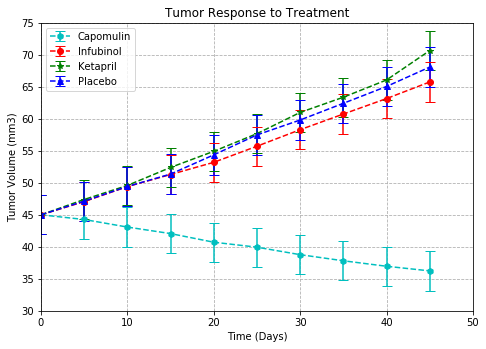

In [65]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

Capomulin_std = byTimeline['Capomulin'].std()
Infubinol_std = byTimeline['Infubinol'].std()
Ketapril_std = byTimeline['Ketapril'].std()
Placebo_std = byTimeline['Placebo'].std()

Capomulin_hadle = plt.errorbar(byTimeline.index, byTimeline['Capomulin'], yerr=Capomulin_std, color='c', fmt='--h', capsize=5, label='Capomulin')
Infubinol_handle = plt.errorbar(byTimeline.index, byTimeline['Infubinol'], yerr=Capomulin_std, color='r', fmt='--o', capsize=5, label='Infubinol')
Ketapril_handle = plt.errorbar(byTimeline.index, byTimeline['Ketapril'], yerr=Capomulin_std, color='g', fmt='--*', capsize=5, label='Ketapril')
Placebo_handle = plt.errorbar(byTimeline.index, byTimeline['Placebo'], yerr=Capomulin_std, color='b', fmt='--^', capsize=5, label='Placebo')

ax1.set_xlim(0, 50)
ax1.set_ylim(30, 75)
ax1.grid(linestyle='--')

ax1.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc=2)
ax1.set_title('Tumor Response to Treatment')
ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('Tumor Volume (mm3)')

fig.savefig("Fig1.png")
plt.show()

In [29]:
byMetastatic = merge_table.pivot_table(values='Metastatic Sites', index=['Drug', 'Timepoint'])
byMetastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [30]:
byMetastatic.iloc[0:len(byMetastatic.loc['Capomulin'])]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [31]:
byTimepoint = merge_table.pivot_table(values='Metastatic Sites', index = 'Timepoint', columns='Drug')
byTimepoint

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


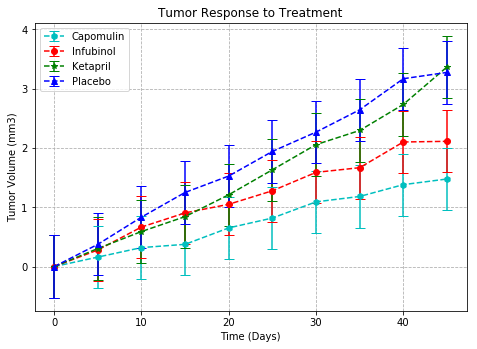

In [64]:
fig = plt.figure()
ax2 = fig.add_axes([0,0,1,1])

Capomulin_std2 = byTimepoint['Capomulin'].std()
Infubinol_std2 = byTimepoint['Infubinol'].std()
Ketapril_std2 = byTimepoint['Ketapril'].std()
Placebo_std2 = byTimepoint['Placebo'].std()

Capomulin_hadle = plt.errorbar(byTimepoint.index, byTimepoint['Capomulin'], yerr=Capomulin_std2, color='c', fmt='--h', capsize=5, label='Capomulin')
Infubinol_handle = plt.errorbar(byTimepoint.index, byTimepoint['Infubinol'], yerr=Capomulin_std2, color='r', fmt='--o', capsize=5, label='Infubinol')
Ketapril_handle = plt.errorbar(byTimepoint.index, byTimepoint['Ketapril'], yerr=Capomulin_std2, color='g', fmt='--*', capsize=5, label='Ketapril')
Placebo_handle = plt.errorbar(byTimepoint.index, byTimepoint['Placebo'], yerr=Capomulin_std2, color='b', fmt='--^', capsize=5, label='Placebo')

ax2.set_xlim = (0, 50)
ax2.set_ylim = (-1, 4)
ax2.grid(linestyle='--')

ax2.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc=2)
ax2.set_title('Tumor Response to Treatment')
ax2.set_xlabel('Time (Days)')
ax2.set_ylabel('Tumor Volume (mm3)')

fig.savefig("Fig2.png")
plt.show()

In [38]:
byCount = merge_table.pivot_table(values='Mouse ID', index=['Drug', 'Timepoint'], aggfunc='count')
byCount.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [39]:
bySurvival = merge_table.pivot_table(values='Mouse ID', index = 'Timepoint', columns='Drug', aggfunc='count')
bySurvival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


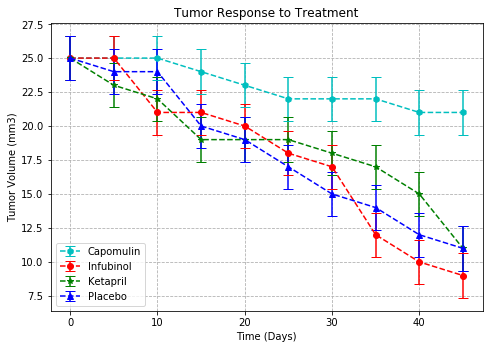

In [63]:
fig = plt.figure()
ax3 = fig.add_axes([0,0,1,1])

Capomulin_std2 = bySurvival['Capomulin'].std()
Infubinol_std2 = bySurvival['Infubinol'].std()
Ketapril_std2 = bySurvival['Ketapril'].std()
Placebo_std2 = bySurvival['Placebo'].std()

Capomulin_hadle = plt.errorbar(bySurvival.index, bySurvival['Capomulin'], yerr=Capomulin_std2, color='c', fmt='--h', capsize=5, label='Capomulin')
Infubinol_handle = plt.errorbar(bySurvival.index, bySurvival['Infubinol'], yerr=Capomulin_std2, color='r', fmt='--o', capsize=5, label='Infubinol')
Ketapril_handle = plt.errorbar(bySurvival.index, bySurvival['Ketapril'], yerr=Capomulin_std2, color='g', fmt='--*', capsize=5, label='Ketapril')
Placebo_handle = plt.errorbar(bySurvival.index, bySurvival['Placebo'], yerr=Capomulin_std2, color='b', fmt='--^', capsize=5, label='Placebo')

ax3.xlim = (0, 50)
ax3.ylim = (5, 27.5)
ax3.grid(linestyle='--')

ax3.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc='best')
ax3.set_title('Tumor Response to Treatment')
ax3.set_xlabel('Time (Days)')
ax3.set_ylabel('Tumor Volume (mm3)')

fig.savefig("Fig3.png")
plt.show()

In [41]:
ColumnList = byTimeline.columns
x = byTimeline.iloc[-1]
y = byTimeline.iloc[0]
Change = ((x-y)/y)*100
Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

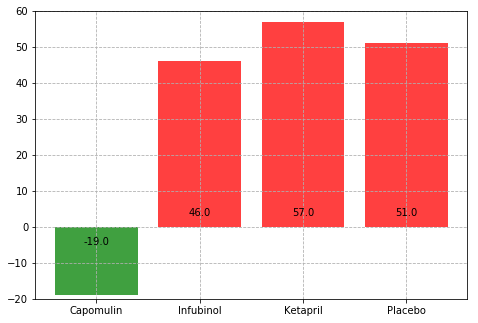

In [66]:
fig = plt.figure()
ax4 = fig.add_axes([0,0,1,1])

x = [1,2,3,4]
x_values = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
y_values = [round(Change.loc['Capomulin']), round(Change.loc['Infubinol']), round(Change.loc['Ketapril']), round(Change.loc['Placebo'])]
colors = ['r' if i>0 else 'g' for i in y_values]
ax4.bar(x, y_values, color=colors, alpha=0.75, tick_label=x_values)

for a,b in zip(x, y_values):
    c = 0
    if b > 0:
        c = 3
    else:
        c = -5
    plt.text(a, c, str(b), ha='center')

ax4.set_ylim(-20, 60)
ax4.grid(linestyle='--')

fig.savefig("Fig4.png")
plt.show()